### At the begginig a bit data ( from table ) preprocessing 

In [5]:
import numpy as np
import pandas as pd
import Bio as bio

In [79]:
Proteins_data = pd.read_csv('proteins_data/prot_data_2.csv')
Proteins_data

,Organism,Protein,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,...,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL,Anyone
0,Campylobacter jejuni,sp|Q0PAS7|CMOA_CAMJE Carboxy-S-adenosyl-L-meth...,19,6,16,14,5,7,19,7,...,26,6,23,6,17,4,1,9,9,0
1,Campylobacter jejuni,sp|Q9PMD9|COAE_CAMJE Dephospho-CoA kinase OS=C...,16,6,12,9,2,6,19,6,...,30,4,14,4,13,5,0,3,7,0
2,Campylobacter jejuni,sp|Q9PP06|APT_CAMJE Adenine phosphoribosyltran...,13,6,10,11,4,4,13,9,...,19,2,11,6,8,8,0,7,7,0
3,Campylobacter jejuni,sp|Q0PC30|ATPB_CAMJE ATP synthase subunit beta...,39,18,16,32,1,13,36,43,...,31,14,22,20,25,20,1,14,40,0
4,Campylobacter jejuni,sp|Q9PJ53|AROQ_CAMJE 3-dehydroquinate dehydrat...,14,6,9,4,3,12,12,13,...,7,8,6,4,6,6,0,4,12,0
5,Campylobacter jejuni,sp|Q0P899|CAS2_CAMJE CRISPR-associated endorib...,3,4,13,5,1,7,12,6,...,19,6,11,3,9,4,0,5,7,0
6,Campylobacter jejuni,sp|Q9PJ21|ATPA_CAMJE ATP synthase subunit alph...,49,26,16,26,1,20,42,43,...,37,9,17,17,28,18,0,14,39,0
7,Campylobacter jejuni,sp|Q46104|ARLY_CAMJE Argininosuccinate lyase O...,33,15,20,29,6,17,36,23,...,39,17,26,9,42,16,1,7,18,0
8,Campylobacter jejuni,sp|Q0P7U6|BIOB_CAMJE Biotin synthase OS=Campyl...,24,10,12,9,11,15,28,18,...,22,8,12,7,18,12,1,7,15,0
9,Campylobacter jejuni,sp|Q9PJ20|ATPG_CAMJE ATP synthase gamma chain ...,22,8,21,12,2,10,29,9,...,34,9,9,4,18,17,0,11,13,0


In [71]:
# Be careful with your data

Data_anal = Proteins_data

labels_categorized = Data_anal[Data_anal.columns[0]].values
feature_matrix = Data_anal[Data_anal.columns[2:22]].values

# in feature matrix we can get rid of 'Anyone' ('X') - means any amino acid, because it's useless shit

feature_matrix

array([[19,  6, 16, ...,  1,  9,  9],
       [16,  6, 12, ...,  0,  3,  7],
       [13,  6, 10, ...,  0,  7,  7],
       ...,
       [42, 28,  9, ..., 10, 17, 34],
       [ 6,  8,  6, ...,  3,  8, 11],
       [17, 11,  6, ...,  5, 10, 26]], dtype=int64)

In [9]:
# Making labels not categorized (slightly)

labels = []

for x in labels_categorized:
    if x == 'Human':
        labels.append(1)
    else:
        labels.append(0)
        
Data_anal['Label'] = labels

### Looking at our data 

In [10]:
# Useful thing

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# To see

print(Data_anal.columns)

Index(['Organism', 'Protein', 'ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU',
       'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR',
       'TRP', 'TYR', 'VAL', 'Anyone', 'Label'],
      dtype='object')


In [14]:
# Data preparing
def for_plot_analyze(label_1, label_2):

    protein_1 = Data_anal[label_1]
    protein_2 = Data_anal[label_2]

    prot_human_1 = []
    prot_other_1 = []

    prot_human_2 = []
    prot_other_2 = []

    for i in range(len(protein_1)):
        if labels[i] == 0:
            prot_other_1.append(protein_1[i])
            prot_other_2.append(protein_2[i])
        else:
            prot_human_1.append(protein_1[i])
            prot_human_2.append(protein_2[i])

    return prot_human_1, prot_human_2, prot_other_1, prot_other_2

In [15]:
# prot dividing

prot_human_ala, prot_human_arg, prot_other_ala, prot_other_arg = for_plot_analyze('ALA', 'ARG')
prot_human_asp, prot_human_cys, prot_other_asp, prot_other_cys = for_plot_analyze('ASP', 'CYS')
prot_human_glu, prot_human_gly, prot_other_glu, prot_other_gly = for_plot_analyze('GLU', 'GLY')
prot_human_ile, prot_human_leu, prot_other_ile, prot_other_leu = for_plot_analyze('ILE', 'LEU')

#print(prot_human_ala)

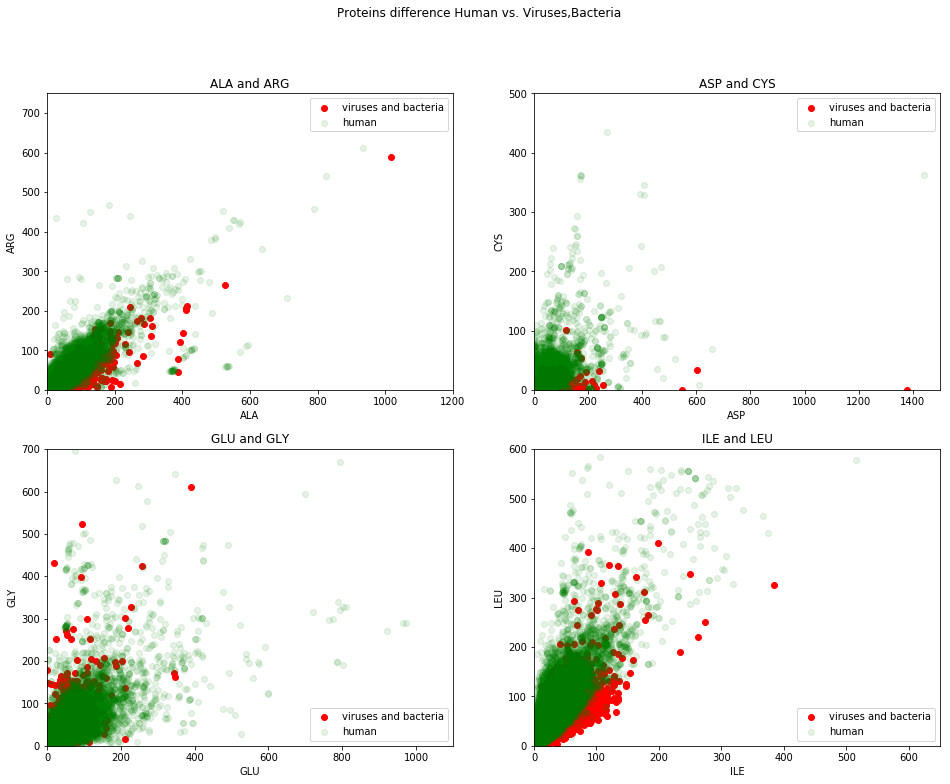

In [26]:
# Plotting

fig = plt.figure(figsize = (16 , 12))

fig.suptitle('Proteins difference Human vs. Viruses,Bacteria')

# ALA and ARG
ax_1 = fig.add_subplot(2,2,1)

ax_1.scatter(prot_other_ala, prot_other_arg, color = 'red', alpha = 1, label = 'viruses and bacteria')
ax_1.scatter(prot_human_ala, prot_human_arg, color = 'green', alpha = 0.1, label = 'human')
ax_1.set_title('ALA' + ' and ' + 'ARG')
#ax.title(123)
ax_1.set_xlabel('ALA')
ax_1.set_ylabel('ARG')
ax_1.set_xlim((0, 1200))
ax_1.set_ylim((0, 750))
ax_1.legend()

# ASP and CYS
ax_2 = fig.add_subplot(2,2,2)

ax_2.scatter(prot_other_asp, prot_other_cys, color = 'red', alpha = 1, label = 'viruses and bacteria')
ax_2.scatter(prot_human_asp, prot_human_cys, color = 'green', alpha = 0.1, label = 'human')
ax_2.set_title('ASP' + ' and ' + 'CYS')
#ax.title(123)
ax_2.set_xlabel('ASP')
ax_2.set_ylabel('CYS')
ax_2.set_xlim((0, 1500))
ax_2.set_ylim((0, 500))
ax_2.legend()

# GLU and GLY
ax_3 = fig.add_subplot(2,2,3)

ax_3.scatter(prot_other_glu, prot_other_gly, color = 'red', alpha = 1, label = 'viruses and bacteria')
ax_3.scatter(prot_human_glu, prot_human_gly, color = 'green', alpha = 0.1, label = 'human')
ax_3.set_title('GLU' + ' and ' + 'GLY')
#ax.title(123)
ax_3.set_xlabel('GLU')
ax_3.set_ylabel('GLY')
ax_3.set_xlim((0, 1100))
ax_3.set_ylim((0, 700))
ax_3.legend()

# GLU and GLY
ax_4 = fig.add_subplot(2,2,4)

ax_4.scatter(prot_other_ile, prot_other_leu, color = 'red', alpha = 1, label = 'viruses and bacteria')
ax_4.scatter(prot_human_ile, prot_human_leu, color = 'green', alpha = 0.1, label = 'human')
ax_4.set_title('ILE' + ' and ' + 'LEU')
#ax.title(123)
ax_4.set_xlabel('ILE')
ax_4.set_ylabel('LEU')
ax_4.set_xlim((0, 650))
ax_4.set_ylim((0, 600))
ax_4.legend()



plt.show()

In [17]:
# Violin plot
# !!! NOT WORKING. TODO: analyze this shit !!!

#f, ax = plt.subplots(1, 1, figsize=(18,8))

#sns.violinplot('ALA','ARG', hue='Label', data = Data_anal , split=True, ax=ax[0])
#ax[0].set_title('ALA and ARG')
#ax[0].set_yticks(range(0, 1, 20))

#plt.show()

In [18]:
# Simple math stats

Proteins_data.describe()

,ALA,ARG,ASN,ASP,CYS,GLN,GLU,GLY,HIS,ILE,...,MET,PHE,PRO,SER,THR,TRP,TYR,VAL,Anyone,Label
count,106549.000000,106549.000000,106549.000000,106549.000000,106549.000000,106549.000000,106549.00000,106549.000000,106549.000000,106549.000000,...,106549.000000,106549.000000,106549.000000,106549.000000,106549.000000,106549.000000,106549.000000,106549.000000,106549.000000,106549.000000
mean,25.639368,18.682803,12.263559,16.536767,6.305784,15.034388,22.42235,22.588208,8.207623,16.143230,...,7.594806,12.299552,19.270064,25.759538,18.187979,4.215854,9.012285,21.103567,0.075712,0.697792
std,31.985621,23.676652,17.450517,23.477241,11.201401,21.789016,35.26464,30.410418,11.480684,22.243922,...,8.908594,15.155737,32.117914,43.292357,36.301044,5.985460,12.250973,30.216599,0.264573,0.459217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,6.000000,3.000000,5.000000,1.000000,4.000000,7.00000,7.000000,2.000000,5.000000,...,3.000000,4.000000,5.000000,8.000000,6.000000,1.000000,2.000000,7.000000,0.000000,0.000000
50%,17.000000,12.000000,7.000000,10.000000,3.000000,9.000000,13.00000,15.000000,5.000000,10.000000,...,5.000000,8.000000,11.000000,15.000000,11.000000,3.000000,6.000000,14.000000,0.000000,1.000000
75%,34.000000,23.000000,15.000000,20.000000,7.000000,17.000000,26.00000,29.000000,10.000000,21.000000,...,10.000000,16.000000,22.000000,29.000000,22.000000,6.000000,12.000000,27.000000,0.000000,1.000000
max,2211.000000,1664.000000,1120.000000,1738.000000,563.000000,985.000000,3436.00000,2087.000000,492.000000,2126.000000,...,408.000000,927.000000,2871.000000,2647.000000,2612.000000,469.000000,1009.000000,3433.000000,2.000000,1.000000


### Starting to make base-line with easy methods 

In [72]:
# Importing SKlearn magic

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [84]:
# Making 2 Train-Test split
# One (final_test_*) for final test and second (test_*) for train-test

train_feature_matrix, final_test_feature_matrix,\
train_labels, final_test_labels = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)
train_feature_matrix_multi, test_feature_matrix_multi,\
train_labels_multi, test_labels_multi = train_test_split(train_feature_matrix, train_labels, test_size=0.2, random_state=42)

In [85]:
# Data preprocessing
# In our case preprocessing can't make any harm, because we asume all our features are equaly important

scaler = preprocessing.StandardScaler()
train_feature_matrix_multi_scaled = scaler.fit_transform(train_feature_matrix_multi)
test_feature_matrix_multi_scaled = scaler.fit_transform(test_feature_matrix_multi)
final_test_feature_matrix_scaled = scaler.fit_transform(final_test_feature_matrix)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversio

#### Method 1: Random Forest

In [86]:
# Will try Random Forest

forest = RandomForestClassifier(n_estimators = 3500, max_depth = 7, \
                                max_features = 'sqrt', bootstrap = 'True', n_jobs = -1)

In [87]:
# Training 

forest.fit(train_feature_matrix_multi, train_labels_multi)

RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=7, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
# Score for test (Accuracy and F1-score)

accuracy_log = forest.score(test_feature_matrix_multi, test_labels_multi)

prediction = forest.predict(test_feature_matrix_multi)

f_1 = f1_score(prediction, test_labels_multi)

print('Acuracy = '+str(accuracy_log))
print('F1 score  = '+str(f_1))

Acuracy = 0.8560534960112623
F1 score  = 0.8230177085850392


In [89]:
# Score for final_test (Accuracy and F1-score)

accuracy_log = forest.score(final_test_feature_matrix, final_test_labels)

prediction = forest.predict(final_test_feature_matrix)

f_1 = f1_score(prediction, final_test_labels)

print('Acuracy = '+str(accuracy_log))
print('F1 score  = '+str(f_1))

Acuracy = 0.8568277803847959
F1 score  = 0.8253810744507841


#### Method 2: Logistic Regression

In [60]:
# Making LogRes class

lr_clf = LogisticRegression(max_iter = 20000, solver = 'saga', tol = 0.00001, penalty = 'l1', C = 0.5, class_weight = { 1 : 0.7 , 0: 1})

In [61]:
# Training 

lr_clf.fit(train_feature_matrix_multi_scaled, train_labels_multi)

LogisticRegression(C=0.5, class_weight={1: 0.7, 0: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=20000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='saga', tol=1e-05, verbose=0, warm_start=False)

In [62]:
# Weights

lr_clf.coef_

array([[-3.73703536, -0.64781873, -1.42826319, -1.85667096,  3.02858638,
         0.71317155,  2.20095644,  0.0842715 ,  0.        , -3.30105562,
         0.        ,  1.48514884,  0.21979578,  0.38173049,  3.31936549,
         4.75076443,  0.17680595, -0.08625506, -0.29147662, -0.11340262]])

In [63]:
# Score for test (Accuracy and F1-score)

accuracy_log = lr_clf.score(test_feature_matrix_multi_scaled, test_labels_multi)

prediction = lr_clf.predict(test_feature_matrix_multi_scaled)

f_1 = f1_score(prediction, test_labels_multi)

print('Acuracy = '+str(accuracy_log))
print('F1 score  = '+str(f_1))

Acuracy = 0.860452839042703
F1 score  = 0.9019898652824125


In [64]:
# Score for final_test (Accuracy and F1-score)

accuracy_log = lr_clf.score(final_test_feature_matrix_scaled, final_test_labels)

prediction = lr_clf.predict(final_test_feature_matrix_scaled)

f_1 = f1_score(prediction, final_test_labels)

print('Acuracy = '+str(accuracy_log))
print('F1 score  = '+str(f_1))

Acuracy = 0.8547160957297044
F1 score  = 0.8966760112134562


#### Method 3: Gradient boosting

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [99]:
# Making

Gradboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=1600)

In [100]:
# Fitting

Gradboost.fit(train_feature_matrix_multi, train_labels_multi)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1600, random_state=None)

In [101]:
# Score for test (Accuracy and F1-score)

accuracy_log = Gradboost.score(test_feature_matrix_multi, test_labels_multi)

prediction = Gradboost.predict(test_feature_matrix_multi)

f_1 = f1_score(prediction, test_labels_multi)

print('Acuracy = '+str(accuracy_log))
print('F1 score  = '+str(f_1))

Acuracy = 0.8983458470201783
F1 score  = 0.9287856996096159


In [102]:
# Score for final_test (Accuracy and F1-score)

accuracy_log = Gradboost.score(final_test_feature_matrix, final_test_labels)

prediction = Gradboost.predict(final_test_feature_matrix)

f_1 = f1_score(prediction, final_test_labels)

print('Acuracy = '+str(accuracy_log))
print('F1 score  = '+str(f_1))

Acuracy = 0.8965274519005162
F1 score  = 0.9275695562198205


#### Method 4: Using PCA

In [39]:
from sklearn.decomposition import PCA

In [92]:
# Starting

pca = PCA(n_components = 10)

data_pca_train = pca.fit_transform(train_feature_matrix_multi)
data_pca_test = pca.fit_transform(test_feature_matrix_multi)
data_pca_final = pca.fit_transform(final_test_feature_matrix)

data_pca_train_scaled = scaler.fit_transform(train_feature_matrix_multi)
data_pca_test_scaled = scaler.fit_transform(test_feature_matrix_multi)
data_pca_final_scaled = scaler.fit_transform(final_test_feature_matrix)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversio

In [93]:
# Making LogRes on it

lr_pca = LogisticRegression(max_iter = 20000, solver = 'saga', tol = 0.00001, penalty = 'l1', C = 0.5, class_weight = { 1 : 0.7 , 0: 1})

In [94]:
# Training

lr_pca.fit(data_pca_train_scaled, train_labels_multi)

LogisticRegression(C=0.5, class_weight={1: 0.7, 0: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=20000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='saga', tol=1e-05, verbose=0, warm_start=False)

In [95]:
# Score for test (Accuracy and F1-score)

accuracy_log = lr_pca.score(data_pca_test_scaled, test_labels_multi)

prediction = lr_pca.predict(data_pca_test_scaled)

f_1 = f1_score(prediction, test_labels_multi)

print('Acuracy = ' + str(accuracy_log))
print('F1 score  = ' + str(f_1))

Acuracy = 0.860452839042703
F1 score  = 0.9019898652824125


In [97]:
# Score for final_test (Accuracy and F1-score)

accuracy_log = lr_pca.score(data_pca_final_scaled, final_test_labels)

prediction = lr_pca.predict(data_pca_final_scaled)

f_1 = f1_score(prediction, final_test_labels)

print('Acuracy = ' + str(accuracy_log))
print('F1 score  = ' + str(f_1))

Acuracy = 0.8547160957297044
F1 score  = 0.8966760112134562
